In [11]:
import numpy as np
import matplotlib.pyplot as plt

from synthesize_plan import *
from problem_definition import get_prob

np.random.seed(4)
prob = get_prob()
uav_pol, cas_pol = synthesize_plan(prob)

constructing augmented network...
finished constructing augmented network in 0.09s
iteration 0, time 0.00
iteration 1, time 0.08
iteration 2, time 0.15
iteration 3, time 0.22
iteration 4, time 0.30
iteration 5, time 0.37
iteration 6, time 0.44
iteration 7, time 0.51
iteration 8, time 0.59
iteration 9, time 0.66
iteration 10, time 0.74
iteration 11, time 0.82
iteration 12, time 0.90
iteration 13, time 0.97
iteration 14, time 1.06
iteration 15, time 1.14
iteration 16, time 1.21
iteration 17, time 1.29
iteration 18, time 1.36
iteration 19, time 1.43
finished after 1.51s and 20 iterations
iteration 0, time 0.00
iteration 1, time 0.00
iteration 2, time 0.01
iteration 3, time 0.01
iteration 4, time 0.01
iteration 5, time 0.01
iteration 6, time 0.02
iteration 7, time 0.02
iteration 8, time 0.02
iteration 9, time 0.02
iteration 10, time 0.03
iteration 11, time 0.03
iteration 12, time 0.03
finished after 0.03s and 12 iterations


success probability: 0.25


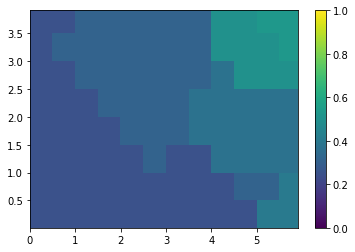

In [12]:
plot_value_cassie(cas_pol, get_prob())

success value: 15.432626302721696


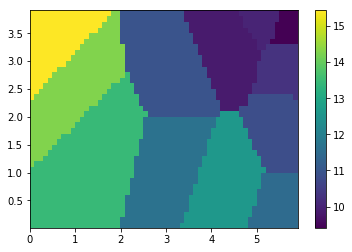

In [13]:
plot_value_uav(uav_pol, get_prob())